# Stock Market Analysis

In [1]:
# Imported the required libraries.
import numpy as np
import pandas as pd
import time
from bs4 import BeautifulSoup
from selenium import webdriver
import requests
import urllib.parse
import re
from selenium.webdriver.common.action_chains import ActionChains
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
%matplotlib inline

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
###   Data Collection: Web Scraping Using Selenium and Beautifulsoup
###   Data Formating: Converted data to a dataframe
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [2]:
# List of prominent companies selected from seven different sectors of USA stock market.
Companies = ["General Motors", "Johnson & Johnson", "Jacobs", "Albemarle", "Disney", "AT&T", "American Airline"]

# BaseURL of Yahoo Finance website.
URL = "https://finance.yahoo.com/"

In [3]:
# Path of Chromium Driver
driver = webdriver.Chrome(executable_path = r"C:\Automation Drivers\chromedriver.exe")

# Driver hits URL
driver.get(URL)
time.sleep(2)

# A pop-up comes at the start to agree terms and conditions. Clicked on agree button using xpath.
driver.find_element_by_xpath("//button[@value='agree']").click()
time.sleep(1)

# Created a list for each company.
GM = []
Johnson = []
Jacobs = []
Albemarle = []
Disney = []
ATT = []
AA = []

# Loop created for each company name from selected companies list.
for Company in Companies:
    print("Started " + Company)
    try:
        time.sleep(3)
        # Driver enters the name of company in Yahoo Finance Searchbox.
        driver.find_element_by_xpath("//input[@placeholder = 'Search for news, symbols or companies']").send_keys(Company)
        time.sleep(4)
        # Driver clicks on Search Button.
        driver.find_element_by_xpath("//button[@id= 'header-desktop-search-button']").click()
        time.sleep(2)
        # Driver clicks on Historical Data tab.
        driver.find_element_by_xpath("//span[text() = 'Historical Data']").click()
        time.sleep(2)

        # Driver scrolls down three times to load the table.
        for i in range(0,3):
            driver.execute_script("window.scrollBy(0,5000)")
            time.sleep(2)
        
        # Page fetched by driver is parsed using BeautifulSoup, extracted table, and rows from the table.
        HTMLPage = BeautifulSoup(driver.page_source, 'html.parser')
        Table = HTMLPage.find('table', class_='W(100%) M(0)')
        Rows = Table.find_all('tr', class_='BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)')

        # Loop created for each row of table.
        for i in range(0, len(Rows)):
            MainDict = {}
            try:
                RowDict = {}
                Values = Rows[i].find_all('td')
                
                # Values (Open, High, Close etc.) are extracted and stored in dictionary.
                if len(Values) == 7:
                    MainDict["Date"] = Values[0].find('span').text.replace(',', '')
                    RowDict["Open"] = Values[1].find('span').text.replace(',', '')
                    RowDict["High"] = Values[2].find('span').text.replace(',', '')
                    RowDict["Low"] = Values[3].find('span').text.replace(',', '')
                    RowDict["Close"] = Values[4].find('span').text.replace(',', '')
                    RowDict["Adj Close"] = Values[5].find('span').text.replace(',', '')
                    RowDict["Volume"] = Values[6].find('span').text.replace(',', '')
                    MainDict["Values"] = RowDict
                    
                    # Dictionary is appended to the list of respective company.
                    if Company == "General Motors":
                        GM.append(MainDict)
                    elif Company == "Johnson & Johnson":
                        Johnson.append(MainDict)
                    elif Company == "Jacobs":
                        Jacobs.append(MainDict)
                    elif Company == "Albemarle":
                        Albemarle.append(MainDict)
                    elif Company == "Disney":
                        Disney.append(MainDict)
                    elif Company == "AT&T":
                        ATT.append(MainDict)
                    elif Company == "American Airline":
                        AA.append(MainDict)
                    
            except:
                # To check the exception caused for which company.
                print(Company + "  " + str(i))
            finally:
                i = i + 1
    except:
        print("Exception for " + Company)
        
# Closed driver as the operation is completed.
driver.close()

Started General Motors
Started Johnson & Johnson
Started Jacobs
Started Albemarle
Started Disney
Started AT&T
Started American Airline


In [11]:
# Function to get a dictionary using date from the list of dictionaries.
def search(value, dictionary):
    return [element for element in dictionary if element['Date'] == value]

In [12]:
startdate = datetime.date(2020, 4, 13)
df = []

# Considered data of last 180 days.
for i in range(-82, 1):
    try:
        row = {}
        date = startdate + pd.DateOffset(days= i)
        date = date.strftime('%b %d %Y')

        # these variables has the values for each date.
        gm = search(date, GM)[0]
        jnsn = search(date, Johnson)[0]
        jcb = search(date, Jacobs)[0]
        alber = search(date, Albemarle)[0]
        dsny = search(date, Disney)[0]
        att = search(date, ATT)[0]
        aal = search(date, AA)[0]

        # All these values of each company are stored in a dictionary
        row['date_time'] = pd.to_datetime(date)
        
        row['gm_open'] = gm['Values']['Open']
        row['gm_close'] = gm['Values']['Close']
        row['gm'] = gm['Values']['Adj Close']
        
        row['jnsn_open'] = jnsn['Values']['Open']
        row['jnsn_close'] = jnsn['Values']['Close']
        row['jnsn'] = jnsn['Values']['Adj Close']
        
        row['jacobs_open'] = jcb['Values']['Open']
        row['jacobs_close'] = jcb['Values']['Close']
        row['jacobs'] = jcb['Values']['Adj Close']

        row['albemarle_open'] = alber['Values']['Open']
        row['albemarle_close'] = alber['Values']['Close']
        row['albemarle'] = alber['Values']['Adj Close']
        
        row['disney_open'] = dsny['Values']['Open']
        row['disney_close'] = dsny['Values']['Close']
        row['disney'] = dsny['Values']['Adj Close']
        
        row['att_open'] = att['Values']['Open']
        row['att_close'] = att['Values']['Close']
        row['att'] = att['Values']['Adj Close']
        
        row['aal_open'] = aal['Values']['Open']
        row['aal_close'] = aal['Values']['Close']
        row['aal'] = aal['Values']['Adj Close']
        
        # dictionary is appended in the list.
        df.append(row)

    except:
        # For the missing dates (Saturday, Sunday, Holidays), values of previous dates are added.
        row = df[-1].copy()
        row['date_time'] = pd.to_datetime(date)
        df.append(row)

In [13]:
# Converted to the dataframe and exported to csv.
df = pd.DataFrame(df)
df.to_csv("files/stock_data.csv", index=False)

In [15]:
# Selected Adjusted Close prices of various companies into a temporary dataframe
cols = ['date_time', 'gm', 'jnsn', 'jacobs', 'albemarle', 'disney', 'att', 'aal']
tempdf = df[cols]

tempdf[cols[1:]] = tempdf[cols[1:]].apply(pd.to_numeric, axis=1)

# Changed the names of the columns
tempdf.columns = ['date_time', 'General Motors', 'Johnson & Johnson', 'Jacobs', 'Albemarle', 'Disney', 'AT&T', 'American Airlines']

## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
##       Visualizations
## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

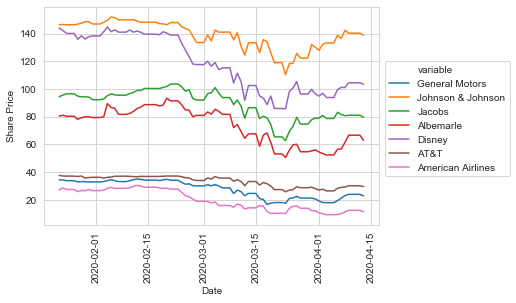

In [17]:
# Using Seaborn library, lineplot is plotted. Given appropriate x label, y label and moved legend to the right of plot.
sns.set_style("whitegrid")
sns.lineplot(x='date_time', y='value', hue='variable', data=pd.melt(tempdf, ['date_time']))
plt.legend(bbox_to_anchor=(1.02, 0.75), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Share Price")

plt.savefig(r"visualizations\StockMarket_AllCompanies.png", dpi=300, bbox_inches='tight')

In [18]:
# Graphs of American Airline, General Motors, AT&T are suppressed. Hence, normalized data to bring it to a common scale.

scaler = StandardScaler()
num_cols = tempdf.columns[tempdf.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

df_scaled = pd.DataFrame(scaler.fit_transform(tempdf[num_cols]), columns=num_cols)
df_scaled = pd.concat([tempdf['date_time'].reset_index(drop=True), df_scaled], axis=1)

df_scaled.to_csv("files/scaled_stock_data.csv")

## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
##      Comparing stocks of various companies
## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

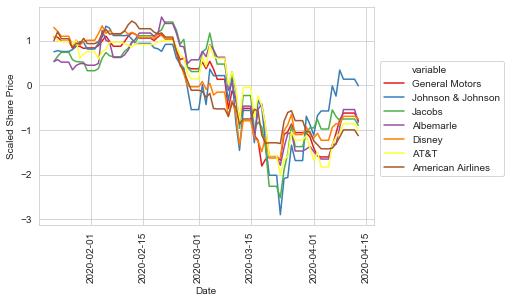

In [19]:
# Share prices of all the companies are scaled to the same scale, and plotted.

sns.lineplot(x='date_time', y='value', hue='variable', data=pd.melt(df_scaled, ['date_time']), palette='Set1')
plt.legend(bbox_to_anchor=(1.02, 0.75), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Scaled Share Price")

plt.savefig(r"visualizations\StockMarket_Scaled_AllCompanies.png", dpi=300, bbox_inches='tight')

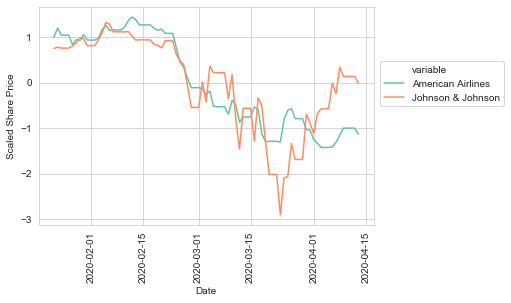

In [20]:
# Comparing Pharmaceutical Industry 'Johnson & Johnson' with Airline Industry 'American Airline'.
# Highest benefit is gained by Pharmaceutical Industry, whereas Airline Industry suffered badly.

PharmaAirline = df_scaled[['date_time', 'American Airlines', 'Johnson & Johnson']]
g = sns.lineplot(x='date_time', y='value', hue='variable', data=pd.melt(PharmaAirline, ['date_time']), palette="Set2")
plt.legend(bbox_to_anchor=(1.02, 0.75), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Scaled Share Price")

plt.savefig(r"visualizations\StockMarket_Scaled_AAJohn.png", dpi=300, bbox_inches='tight')

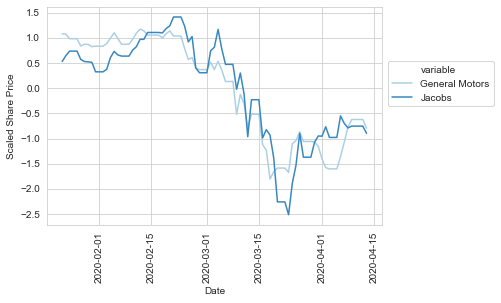

In [21]:
# As Automative industry had to stop production and Construction industry had to stop services due to lockdown, 
# a negative impact has been done on its share prices.

GMJCB = df_scaled[['date_time', 'General Motors', 'Jacobs']]
sns.lineplot(x='date_time', y='value', hue='variable', data=pd.melt(GMJCB, ['date_time']), palette='Blues')
plt.legend(bbox_to_anchor=(1.02, 0.75), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Scaled Share Price")

plt.savefig(r"visualizations\StockMarket_Scaled_GMJcb.png", dpi=300, bbox_inches='tight')

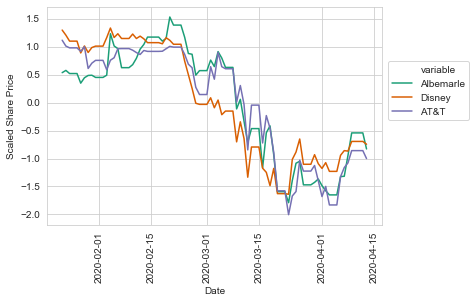

In [22]:
# Stocks of Chemical, Entertainment and Telecommunication Industry are compared here.

CET = df_scaled[['date_time', 'Albemarle', 'Disney', 'AT&T']]
sns.lineplot(x='date_time', y='value', hue='variable', data=pd.melt(CET, ['date_time']), palette='Dark2')
plt.legend(bbox_to_anchor=(1.02, 0.75), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Scaled Share Price")

plt.savefig(r"visualizations\StockMarket_Scaled_AlbDsnATT.png", dpi=300, bbox_inches='tight')

## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Generating test images for some random dates
## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [23]:
date_list = tempdf['date_time']
date_list = pd.DataFrame(date_list)
date_list.head()

,date_time
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [24]:
date_list_test = date_list.iloc[[0, 29, 58, 82]]
date_list_test

,date_time
0,2020-01-22
29,2020-02-20
58,2020-03-20
82,2020-04-13


In [25]:
tempdf.head()

,date_time,General Motors,Johnson & Johnson,Jacobs,Albemarle,Disney,AT&T,American Airlines
0,2020-01-22,34.49,146.30,94.43,80.56,144.01,37.71,27.22
1,2020-01-23,34.46,146.57,95.63,81.08,142.20,37.31,28.69
2,2020-01-24,33.90,146.37,96.57,80.36,140.08,37.19,27.54
3,2020-01-25,33.90,146.37,96.57,80.36,140.08,37.19,27.54
4,2020-01-26,33.90,146.37,96.57,80.36,140.08,37.19,27.54


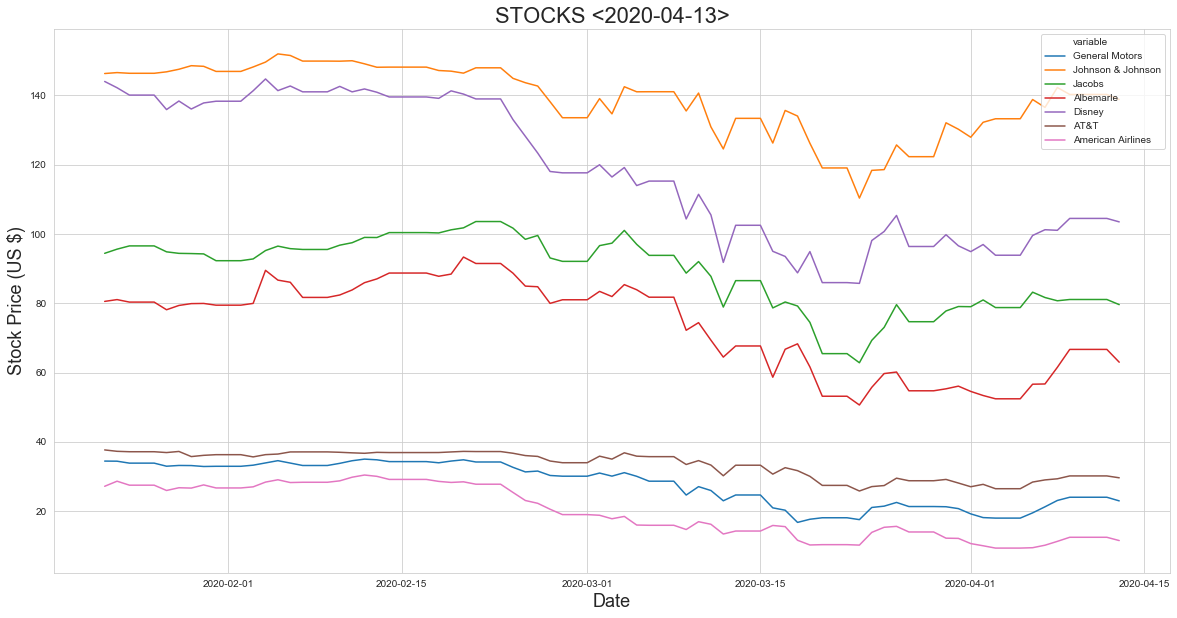

In [26]:
image_no = 0
fig, ax3 = plt.subplots(1, figsize=(20, 10))

sns.lineplot(x='date_time', y='value', hue='variable',
             data=pd.melt(tempdf, ['date_time']))

# for i in range(0, len(date_list)):
for i in range(0, len(date_list_test)):
    date_for_mask = date_list_test.date_time.values[i]
    mask_stock = (tempdf['date_time'] == date_for_mask)
    my_stock = tempdf.loc[mask_stock]
    
    ax3_vline = ax3.axvline(date_for_mask, c='k', lw=2.0)
    plt.title('STOCKS <' + str(date_for_mask)[:10] + '>', fontsize=22)
    plt.xlabel('Date', fontdict = {'fontsize': 18, 'fontweight' : 3})
    plt.ylabel('Stock Price (US $)', fontdict = {'fontsize': 18, 'fontweight' : 3})
    
    plt.savefig(r'test_images\Stock_{image_no:04d}.png'.format(image_no=image_no), 
                dpi=300, bbox_inches='tight')
    ax3_vline.remove()
    image_no +=1

## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
##        Generating Images for every date
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [27]:
date_list.head()

,date_time
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


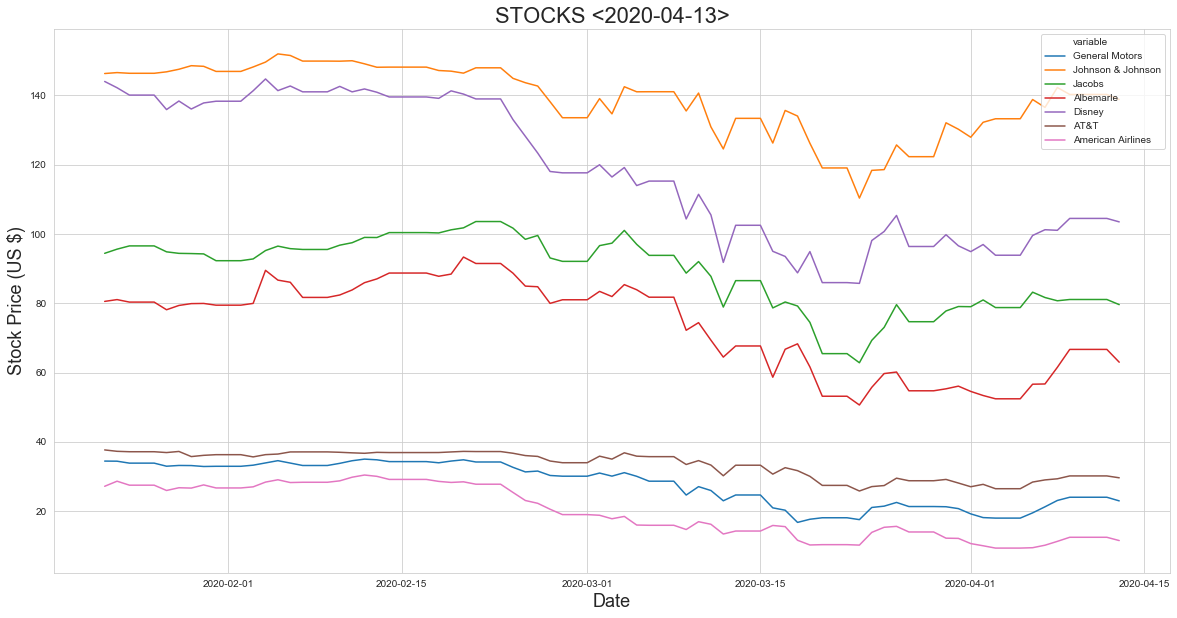

In [28]:
image_no = 0
fig, ax3 = plt.subplots(1, figsize=(20, 10))

sns.lineplot(x='date_time', y='value', hue='variable',
             data=pd.melt(tempdf, ['date_time']))

for i in range(0, len(date_list)):
    date_for_mask = date_list.date_time.values[i]
    mask_stock = (tempdf['date_time'] == date_for_mask)
    my_stock = tempdf.loc[mask_stock]
    
    ax3_vline = ax3.axvline(date_for_mask, c='k', lw=2.0)
    plt.title('STOCKS <' + str(date_for_mask)[:10] + '>', fontsize=22)
    plt.xlabel('Date', fontdict = {'fontsize': 18, 'fontweight' : 3})
    plt.ylabel('Stock Price (US $)', fontdict = {'fontsize': 18, 'fontweight' : 3})
    
    plt.savefig(r'images\Stock_{image_no:04d}.png'.format(image_no=image_no), 
                dpi=300, bbox_inches='tight')
    ax3_vline.remove()
    image_no +=1

## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Generating Video from images
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [29]:
# Checking if the paths are available

images_path = "images/"
videos_path = "videos/" 

print(os.path.isdir(images_path))
print(os.path.isdir(videos_path))

True
True


In [30]:
# Making a video out of all the images
# One Image per Second

os.system("ffmpeg -f image2 -r 1 -s 1024x768 -i images/Stock_%04d.png -vcodec mpeg4 -y videos/video_fr_1.mp4")

0

In [31]:
# Making a video out of all the images
# Four Images per Second

os.system("ffmpeg -f image2 -r 4 -s 1024x768 -i images/Stock_%04d.png -vcodec mpeg4 -y videos/video_fr_4.mp4")

0

In [32]:
# Making a video out of all the images
# One Image per Four Seconds

os.system("ffmpeg -f image2 -r 1/4 -s 1024x768 -i images/Stock_%04d.png -vcodec mpeg4 -y videos/video_fr_1_by_4.mp4")

0

#                                             Thank You !